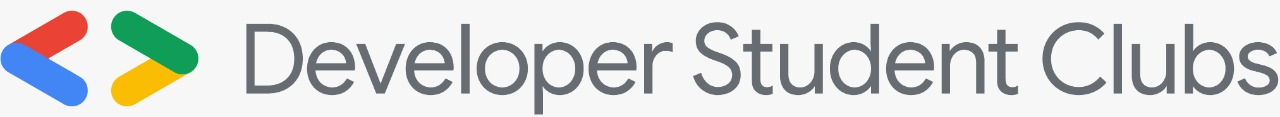

# The Pandas DataFrame -Data Structure- :

### your only true firend when dealing with data is pd.DataFrame, let's see how to create it!

In [1]:
import pandas as pd 

In [2]:
# creating 3 series with indexes ( name . item purchased , cost )

purchase_1 = pd.Series({'Name': 'Chris',
                        'Item Purchased': 'Dog Food',
                        'Cost': 22.50})

purchase_2 = pd.Series({'Name': 'Kevyn',
                        'Item Purchased': 'Kitty Litter',
                        'Cost': 2.50})

purchase_3 = pd.Series({'Name': 'Vinod',
                        'Item Purchased': 'Bird Seed',
                        'Cost': 5.00})

# compining the three pandas series in one big array
purchase= [purchase_1, purchase_2, purchase_3]

# lets print each one
print(f'first series: \n\n{purchase_1} \n\nsecond series: \n\n{purchase_2} \n\nthird series: \n\n{purchase_3} ')

first series: 

Name                 Chris
Item Purchased    Dog Food
Cost                  22.5
dtype: object 

second series: 

Name                     Kevyn
Item Purchased    Kitty Litter
Cost                       2.5
dtype: object 

third series: 

Name                  Vinod
Item Purchased    Bird Seed
Cost                      5
dtype: object 


In [3]:
# creating a DataFrame object our of the compined series
# notice the index values
df = pd.DataFrame( purchase  ) 
df.head()

,Name,Item Purchased,Cost
0,Chris,Dog Food,22.5
1,Kevyn,Kitty Litter,2.5
2,Vinod,Bird Seed,5.0


In [4]:
# creating a DataFrame object our of the compined series
# and assigning index for each row
df = pd.DataFrame( purchase , index=['Store 1', 'Store 1', 'Store 2'] )
df.head() # to print the head of the dataframe-table

,Name,Item Purchased,Cost
Store 1,Chris,Dog Food,22.5
Store 1,Kevyn,Kitty Litter,2.5
Store 2,Vinod,Bird Seed,5.0


In [5]:
# accessing values by using labeled index
df.loc['Store 2']  #same as  df.Store 2 

Name                  Vinod
Item Purchased    Bird Seed
Cost                      5
Name: Store 2, dtype: object

In [6]:
# let see the type of the variable returned
type( df.loc['Store 2'] ) 
# because it's not retunring only one value
# it returns a whole series

pandas.core.series.Series

### How to extract values of data

In [7]:
# lets print the data again

df.head()

,Name,Item Purchased,Cost
Store 1,Chris,Dog Food,22.5
Store 1,Kevyn,Kitty Litter,2.5
Store 2,Vinod,Bird Seed,5.0


In [8]:
# using label index to specify the row and column names
# it returns pandas series again as it's not only one value
print( type( df.loc['Store 1', 'Cost'] ) )
df.loc['Store 1', 'Cost']

<class 'pandas.core.series.Series'>


Store 1    22.5
Store 1     2.5
Name: Cost, dtype: float64

In [9]:
# using the transpose method 
df.T

,Store 1,Store 1,Store 2
Name,Chris,Kevyn,Vinod
Item Purchased,Dog Food,Kitty Litter,Bird Seed
Cost,22.5,2.5,5


In [10]:
# getting the index of both df and df.T
print( df.T.index  ) # index of transposed

print( df.index )# index of normal df


Index(['Name', 'Item Purchased', 'Cost'], dtype='object')
Index(['Store 1', 'Store 1', 'Store 2'], dtype='object')


In [11]:
df.head()

,Name,Item Purchased,Cost
Store 1,Chris,Dog Food,22.5
Store 1,Kevyn,Kitty Litter,2.5
Store 2,Vinod,Bird Seed,5.0


In [12]:
# can't use index-based indexing like this 

df.iloc[ 0 , 'Name']


ValueError: Location based indexing can only have [integer, integer slice (START point is INCLUDED, END point is EXCLUDED), listlike of integers, boolean array] types

In [13]:
# you need to only provide int values or intervals

df.iloc[ 0 , 0 ] 

'Chris'

In [14]:
df.iloc[ 0 , : ]  # will print all col. for row one

Name                 Chris
Item Purchased    Dog Food
Cost                  22.5
Name: Store 1, dtype: object

In [15]:
# same as before you can either use string for calling or use intervals

df.loc[0 , 'Name']

KeyError: 0

In [51]:
df.loc[ 0:6 ,'Name']

KeyError: 'Name'

### How to remove rows or columns you say? just be carefull of ruining your life with simple mistake!!

In [17]:
# to drop index row it's as simple as this
df.drop('Store 1',inplace=False)

# notice it didn't change the real data because inplace = False!

,Name,Item Purchased,Cost
Store 2,Vinod,Bird Seed,5.0


In [18]:
# lets print the data and see
df

,Name,Item Purchased,Cost
Store 1,Chris,Dog Food,22.5
Store 1,Kevyn,Kitty Litter,2.5
Store 2,Vinod,Bird Seed,5.0


In [19]:
# to drop column tho you will need to provide the axis
df.drop( 'Item Purchased' , axis = 1)

,Name,Cost
Store 1,Chris,22.5
Store 1,Kevyn,2.5
Store 2,Vinod,5.0


In [20]:
# lets try not to provide the axis?
df.drop( 'Item Purchased' )

# see? that's why you won't always be lucky, maybe there's a row
# called item purchased and you removed it unintentionally!


KeyError: "['Item Purchased'] not found in axis"

In [21]:
copy_df = df.copy() # always make sure to copy your data to make sure
copy_df = copy_df.drop('Store 2')
copy_df # now let's remove one for real ha

,Name,Item Purchased,Cost
Store 1,Chris,Dog Food,22.5
Store 1,Kevyn,Kitty Litter,2.5


In [22]:
# another way to in-place delete a col// doesn't work on rows
del copy_df['Name']
copy_df

,Item Purchased,Cost
Store 1,Dog Food,22.5
Store 1,Kitty Litter,2.5


In [23]:
df['Location'] = None # create a whole column filled with None values
df

,Name,Item Purchased,Cost,Location
Store 1,Chris,Dog Food,22.5,None
Store 1,Kevyn,Kitty Litter,2.5,None
Store 2,Vinod,Bird Seed,5.0,None


In [24]:
# let's use dropna to clean that None values
df.dropna()

# OOOOPS !!! ,, next tiem you do anything first cope the data
# second focus which axis is the data you want to change !

,Name,Item Purchased,Cost,Location


In [25]:
# let's print the shape of the data, and always keep an eye on that
df.shape
# axis = -1
# as you can see here location is in the second dimention

(3, 4)

In [26]:
df.dropna(axis=1) # dropping the right axis filled with None

,Name,Item Purchased,Cost
Store 1,Chris,Dog Food,22.5
Store 1,Kevyn,Kitty Litter,2.5
Store 2,Vinod,Bird Seed,5.0


In [27]:
# let's see the data again with the location col
df

,Name,Item Purchased,Cost,Location
Store 1,Chris,Dog Food,22.5,None
Store 1,Kevyn,Kitty Litter,2.5,None
Store 2,Vinod,Bird Seed,5.0,None


In [28]:
# let's change the value of col location crossed with row store 2 , and assign the value to 5
# notice that you can access columns with . followed by the column name
df.Location['Store 2'] = 5 
#df.loc['Store 2','Location']
df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Name,Item Purchased,Cost,Location
Store 1,Chris,Dog Food,22.5,None
Store 1,Kevyn,Kitty Litter,2.5,None
Store 2,Vinod,Bird Seed,5.0,5


In [29]:
df

,Name,Item Purchased,Cost,Location
Store 1,Chris,Dog Food,22.5,None
Store 1,Kevyn,Kitty Litter,2.5,None
Store 2,Vinod,Bird Seed,5.0,5


In [30]:
df.dropna() 

# without assigning axis it automatically removes rows axis=0

,Name,Item Purchased,Cost,Location
Store 2,Vinod,Bird Seed,5.0,5


In [31]:
df.dropna(axis=1) # where with axis = 1 it removes col with None 

,Name,Item Purchased,Cost
Store 1,Chris,Dog Food,22.5
Store 1,Kevyn,Kitty Litter,2.5
Store 2,Vinod,Bird Seed,5.0


In [32]:
df.fillna( value=3 , method= None ) 
# lambda x: df.sum()/len(df)

,Name,Item Purchased,Cost,Location
Store 1,Chris,Dog Food,22.5,3
Store 1,Kevyn,Kitty Litter,2.5,3
Store 2,Vinod,Bird Seed,5.0,5


### Enough cleaning let's try to make some QuWicK maPhS. excuse my introvert sense of humour. 

In [33]:
# lets first extract the value of Cost column
costs = df['Cost'] 
costs

Store 1    22.5
Store 1     2.5
Store 2     5.0
Name: Cost, dtype: float64

In [34]:
# remember broadcasting?
costs+=2
costs

Store 1    24.5
Store 1     4.5
Store 2     7.0
Name: Cost, dtype: float64

In [35]:
# again let's print the df, always keep it infront of you
# your DF is your only friend here.
df

,Name,Item Purchased,Cost,Location
Store 1,Chris,Dog Food,22.5,None
Store 1,Kevyn,Kitty Litter,2.5,None
Store 2,Vinod,Bird Seed,5.0,5


In [37]:
# you can change the name of the columns or indexes using .rename btw
df.rename( columns={ 'Location': 'None testing'  }, inplace=True)
df

,Name,Item Purchased,Cost,None testing
Store 1,Chris,Dog Food,22.5,None
Store 1,Kevyn,Kitty Litter,2.5,None
Store 2,Vinod,Bird Seed,5.0,5


## Pandas Read Options:

        pd.read_clipboard
        pd.read_excel
        pd.read_feather
        pd.read_html
        pd.read_json
        pd.read_sql
        pd.read_sql_query
        pd.read_sql_table
        pd.read_table
        pd.read_sas

In [38]:
# let's see some real data set ha
df = pd.read_csv('olympics.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,NaN,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !,02 !,03 !,Total,№ Games,01 !,02 !,03 !,Combined total
1,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
2,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
3,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
4,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12


In [52]:
# remove the first index row 
df = pd.read_csv('olympics.csv', skiprows=1) 
df.head()

,Unnamed: 0,№ Summer,01 !,02 !,03 !,Total,№ Winter,01 !.1,02 !.1,03 !.1,Total.1,№ Games,01 !.2,02 !.2,03 !.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [40]:
# print out the columns
df.columns

Index(['Unnamed: 0', '№ Summer', '01 !', '02 !', '03 !', 'Total', '№ Winter',
       '01 !.1', '02 !.1', '03 !.1', 'Total.1', '№ Games', '01 !.2', '02 !.2',
       '03 !.2', 'Combined total'],
      dtype='object')

#### As you noticed and if you read the discreption you will see that the col. names are coded, 
#### so let's rename it as 01 -> gold ,,, 02-> silver ,,, 03-> bronze ,, and for № let's set it as number # 

In [53]:
# where keys are col name , and the values to be replaced with is 'Gold + num if found
for col in df.columns:
    if col[:2]=='01':
        df.rename( columns={ col: 'Gold' + col[4:] } , inplace=True ) # if there is string like !.1 so from index [4:] to put it in the string name
        
    if col[:2]=='02':
        df.rename( columns={col:'Silver' + col[4:]} , inplace=True )
        
    if col[:2]=='03':
        df.rename( columns={col:'Bronze' + col[4:]} , inplace=True )
        
    if col[:1]=='№':
        df.rename( columns={col:'#' + col[1:]} , inplace=True ) 

df.head()

,Unnamed: 0,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


### Let's stark making some masks! - not fancy one's tho -

In [42]:
# let's see the mask where at least each row has 1 gold medal

df['Gold'] > 0
# notice how the output is boolean type

0      False
1       True
2       True
3       True
4       True
       ...  
142    False
143    False
144     True
145     True
146     True
Name: Gold, Length: 147, dtype: bool

In [43]:
# let's try to use that masked array now and print the dataframe 
# with only the countries with 1 gold medal at least
df_cut = df[ df['Gold'] > 0 ] # print only df if the df['gold']>0
df_cut.head()


,Unnamed: 0,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12
5,Australia (AUS) [AUS] [Z],25,139,152,177,468,18,5,3,4,12,43,144,155,181,480


In [44]:
# another usage of masks is using multi conditions

len( df[ (df['Gold'] > 0) | (df['Gold.1'] > 0) ] )

# if (df['Gold'] > 0) | (df['Gold.1'] > 0):
    #print(df)

101

In [ ]:
df[ [ True , False ] ]

In [45]:
df[ (df['Gold.1'] > 0) & (df['Gold'] == 0) ]

,Unnamed: 0,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
75,Liechtenstein (LIE),16,0,0,0,0,18,2,2,5,9,34,2,2,5,9


In [46]:
# now let's try to count all the gold medals won 
df['Gold'].count()
#df.loc[: , 'Gold']

147

### People stay hydrated really, thanks for staying this long, god be with you :v

### Let's descover more index functions

In [47]:
df.head()

,Unnamed: 0,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [48]:
# here we can reset the row inedx from the defacto ( 0 --> len-1 )
df = df.reset_index()
df.head()
# see how the index coulmn appeared and got saved into the df

,index,Unnamed: 0,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
0,0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
1,1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
2,2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
3,3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
4,4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [49]:
# now let's change the index and set it as the country col
df = df.set_index('Unnamed: 0')
df.head()

,index,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total
Unnamed: 0,,,,,,,,,,,,,,,,
Afghanistan (AFG),0,13,0,0,2,2,0,0,0,0,0,13,0,0,2,2
Algeria (ALG),1,12,5,2,8,15,3,0,0,0,0,15,5,2,8,15
Argentina (ARG),2,23,18,24,28,70,18,0,0,0,0,41,18,24,28,70
Armenia (ARM),3,5,1,2,9,12,6,0,0,0,0,11,1,2,9,12
Australasia (ANZ) [ANZ],4,2,3,4,5,12,0,0,0,0,0,2,3,4,5,12


In [54]:
# you can also save your current index in a column
df['country'] = df.index
df.head()

,Unnamed: 0,# Summer,Gold,Silver,Bronze,Total,# Winter,Gold.1,Silver.1,Bronze.1,Total.1,# Games,Gold.2,Silver.2,Bronze.2,Combined total,country
0,Afghanistan (AFG),13,0,0,2,2,0,0,0,0,0,13,0,0,2,2,0
1,Algeria (ALG),12,5,2,8,15,3,0,0,0,0,15,5,2,8,15,1
2,Argentina (ARG),23,18,24,28,70,18,0,0,0,0,41,18,24,28,70,2
3,Armenia (ARM),5,1,2,9,12,6,0,0,0,0,11,1,2,9,12,3
4,Australasia (ANZ) [ANZ],2,3,4,5,12,0,0,0,0,0,2,3,4,5,12,4


## Just one more left, please hang in there, I can't feel my legs either. 

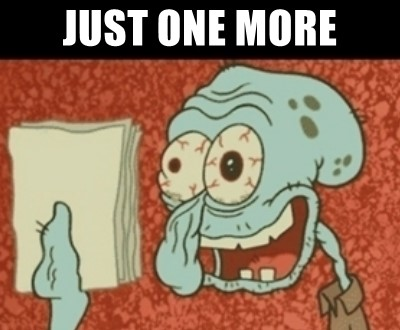